In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("health_monitoring.csv")
df.head()

,Device-ID/User-ID,Timestamp,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure,Blood Pressure Below/Above Threshold (Yes/No),Glucose Levels,Glucose Levels Below/Above Threshold (Yes/No),Oxygen Saturation (SpO₂%),SpO₂ Below Threshold (Yes/No),Alert Triggered (Yes/No),Caregiver Notified (Yes/No)
0,D1000,1/22/2025 20:42,116,Yes,136/79 mmHg,Yes,141,Yes,98,No,Yes,Yes
1,D1001,1/16/2025 12:22,119,Yes,105/77 mmHg,No,146,Yes,93,No,Yes,Yes
2,D1002,1/10/2025 9:26,97,No,120/87 mmHg,Yes,133,No,97,No,Yes,Yes
3,D1003,1/10/2025 9:53,113,Yes,138/65 mmHg,Yes,82,No,98,No,Yes,Yes
4,D1004,1/3/2025 15:50,88,No,108/69 mmHg,No,146,Yes,97,No,Yes,Yes


In [37]:
df.isna().any()

Device-ID/User-ID                                False
Timestamp                                        False
Heart Rate                                       False
Heart Rate Below/Above Threshold (Yes/No)        False
Blood Pressure                                   False
Blood Pressure Below/Above Threshold (Yes/No)    False
Glucose Levels                                   False
Glucose Levels Below/Above Threshold (Yes/No)    False
Oxygen Saturation (SpO₂%)                        False
SpO₂ Below Threshold (Yes/No)                    False
Alert Triggered (Yes/No)                         False
Caregiver Notified (Yes/No)                      False
dtype: bool

In [38]:
df.columns.shape

(12,)

In [39]:
df.columns

Index(['Device-ID/User-ID', 'Timestamp', 'Heart Rate',
       'Heart Rate Below/Above Threshold (Yes/No)', 'Blood Pressure',
       'Blood Pressure Below/Above Threshold (Yes/No)', 'Glucose Levels',
       'Glucose Levels Below/Above Threshold (Yes/No)',
       'Oxygen Saturation (SpO₂%)', 'SpO₂ Below Threshold (Yes/No)',
       'Alert Triggered (Yes/No)', 'Caregiver Notified (Yes/No)'],
      dtype='object')

In [40]:
df = df.drop(['Device-ID/User-ID', 'Timestamp'], axis=1)

In [41]:
print("Feature Ranges:")
print(df.describe().T[['min', 'max']])
"checked for satndard scaling"

Feature Ranges:
                            min    max
Heart Rate                 60.0  120.0
Glucose Levels             70.0  150.0
Oxygen Saturation (SpO₂%)  90.0  100.0


'checked for satndard scaling'

In [42]:
df[['Systolic_BP_mmHg', 'Diastolic_BP_mmHg']] = df['Blood Pressure'].str.replace(' mmHg', '').str.split('/', expand=True).astype(int)
df.drop('Blood Pressure', axis=1, inplace=True)

In [43]:
df['Alert'] = df['Alert Triggered (Yes/No)'].map({'Yes': 1, 'No': 0})
df.drop(['Alert Triggered (Yes/No)', 'Caregiver Notified (Yes/No)'], axis=1, inplace=True)

In [44]:
df.head()

,Heart Rate,Heart Rate Below/Above Threshold (Yes/No),Blood Pressure Below/Above Threshold (Yes/No),Glucose Levels,Glucose Levels Below/Above Threshold (Yes/No),Oxygen Saturation (SpO₂%),SpO₂ Below Threshold (Yes/No),Systolic_BP_mmHg,Diastolic_BP_mmHg,Alert
0,116,Yes,Yes,141,Yes,98,No,136,79,1
1,119,Yes,No,146,Yes,93,No,105,77,1
2,97,No,Yes,133,No,97,No,120,87,1
3,113,Yes,Yes,82,No,98,No,138,65,1
4,88,No,No,146,Yes,97,No,108,69,1


In [45]:
threshold_cols = [
    'Heart Rate Below/Above Threshold (Yes/No)',
    'Blood Pressure Below/Above Threshold (Yes/No)',
    'Glucose Levels Below/Above Threshold (Yes/No)',
    'SpO₂ Below Threshold (Yes/No)'
]
for col in threshold_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.rename(columns={
    'Heart Rate Below/Above Threshold (Yes/No)': 'heart_rate_threshold',
    'Blood Pressure Below/Above Threshold (Yes/No)': 'blood_pressure_threshold',
    'Glucose Levels Below/Above Threshold (Yes/No)': 'glucose_threshold',
    'SpO₂ Below Threshold (Yes/No)': 'spo2_threshold'
}, inplace=True)


In [46]:
df['bp_difference'] = df['Systolic_BP_mmHg'] - df['Diastolic_BP_mmHg']

In [47]:
df.head()

,Heart Rate,heart_rate_threshold,blood_pressure_threshold,Glucose Levels,glucose_threshold,Oxygen Saturation (SpO₂%),spo2_threshold,Systolic_BP_mmHg,Diastolic_BP_mmHg,Alert,bp_difference
0,116,1,1,141,1,98,0,136,79,1,57
1,119,1,0,146,1,93,0,105,77,1,28
2,97,0,1,133,0,97,0,120,87,1,33
3,113,1,1,82,0,98,0,138,65,1,73
4,88,0,0,146,1,97,0,108,69,1,39


In [48]:
df = df.drop(['heart_rate_threshold', 'blood_pressure_threshold', 'glucose_threshold', 'spo2_threshold'], axis=1)
df.head()


,Heart Rate,Glucose Levels,Oxygen Saturation (SpO₂%),Systolic_BP_mmHg,Diastolic_BP_mmHg,Alert,bp_difference
0,116,141,98,136,79,1,57
1,119,146,93,105,77,1,28
2,97,133,97,120,87,1,33
3,113,82,98,138,65,1,73
4,88,146,97,108,69,1,39


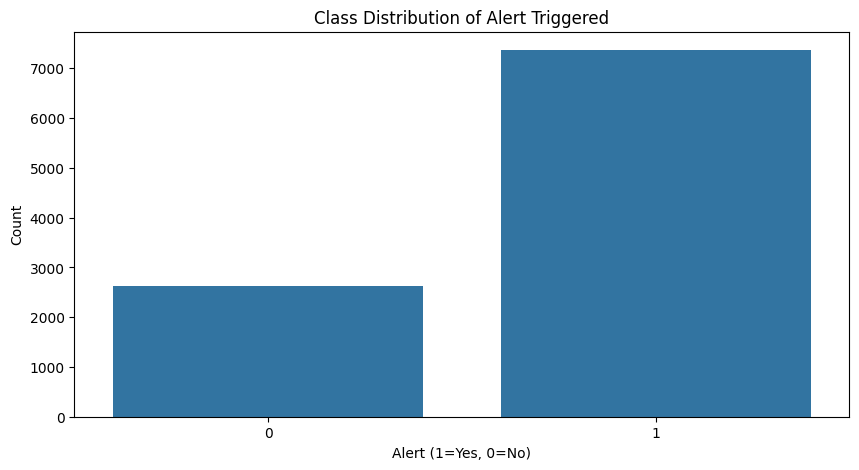

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Alert', data=df)
plt.title('Class Distribution of Alert Triggered')
plt.xlabel('Alert (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [50]:
"above countour plot shows that sampling is required bcz there is imbalance in dataset.."

'above countour plot shows that sampling is required bcz there is imbalance in dataset..'

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
x = df.drop(columns=["Alert"])
y = df["Alert"]

In [21]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [23]:
balanced_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=["Alert"])], axis=1)

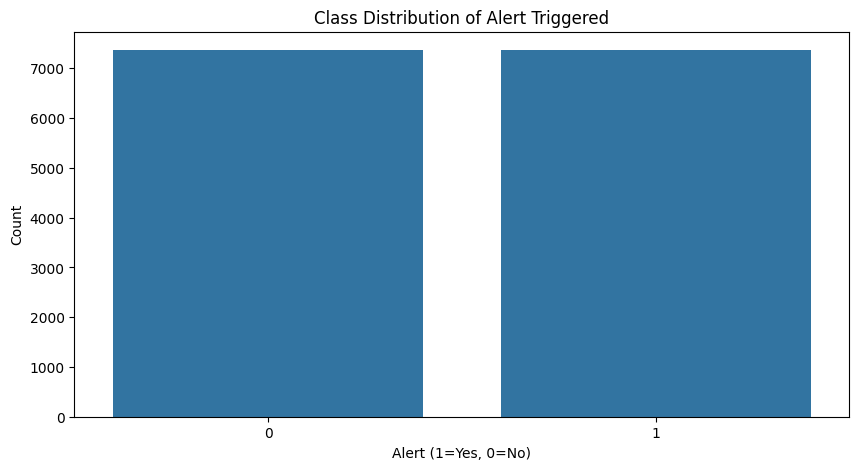

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Alert', data=balanced_df)
plt.title('Class Distribution of Alert Triggered')
plt.xlabel('Alert (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [53]:
"above plot and code is for RandomOverSamler "

'above plot and code is for RandomOverSamler '

In [52]:
"lets try SMOTE"

'lets try SMOTE'

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
x = df.drop(columns=["Alert"])
y = df["Alert"]

In [61]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [62]:
balanced_df = pd.concat([pd.DataFrame(x_smote, columns=x.columns), pd.DataFrame(y_smote, columns=["Alert"])], axis=1)

In [63]:
print(balanced_df["Alert"].value_counts())

Alert
1    7367
0    7367
Name: count, dtype: int64


In [64]:
balanced_df.shape

(14734, 7)

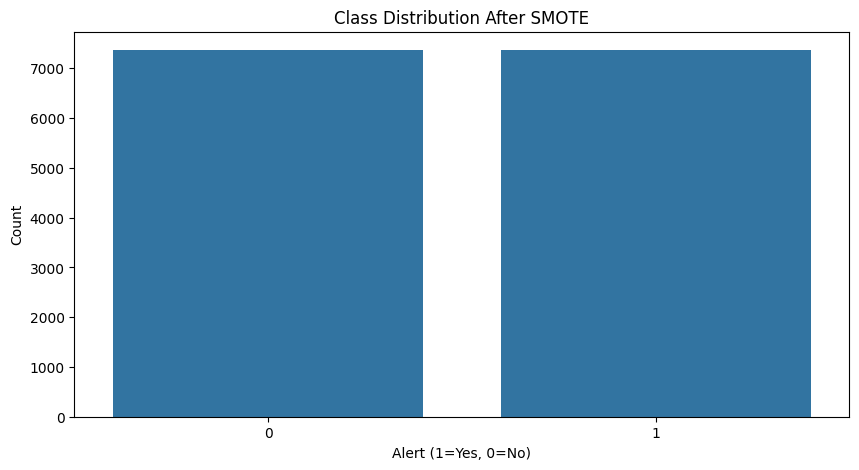

In [65]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Alert', data=balanced_df)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Alert (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

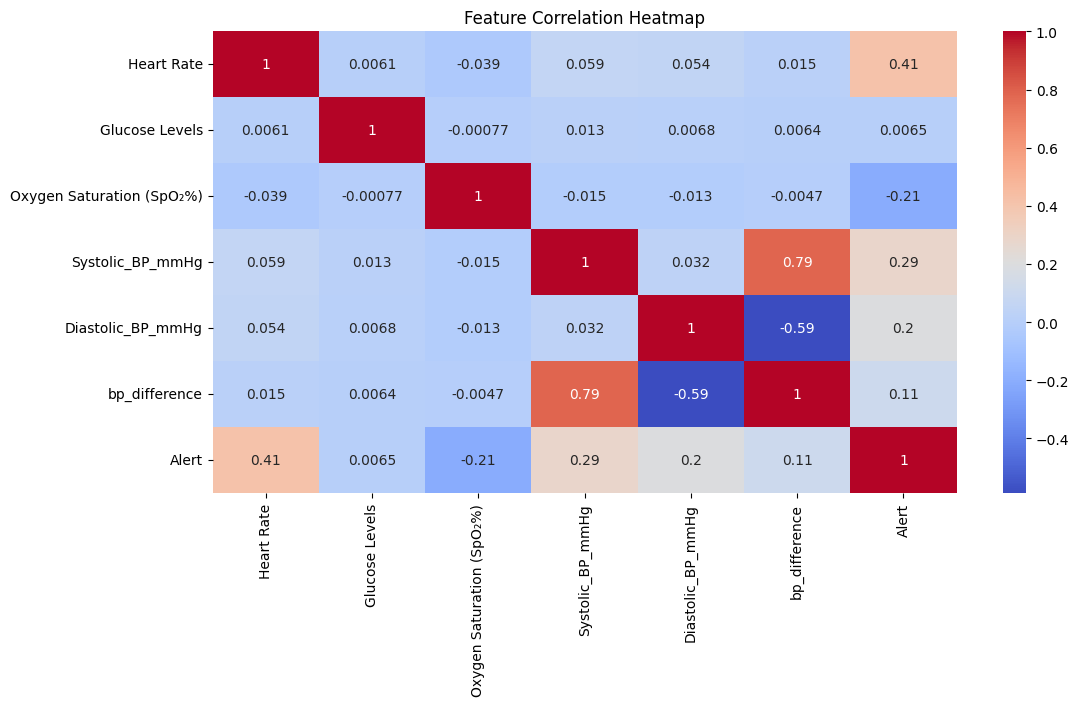

In [26]:
#plt.figure(figsize=(12, 6))
#sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm')
#plt.title("Feature Correlation Heatmap")
#plt.show()

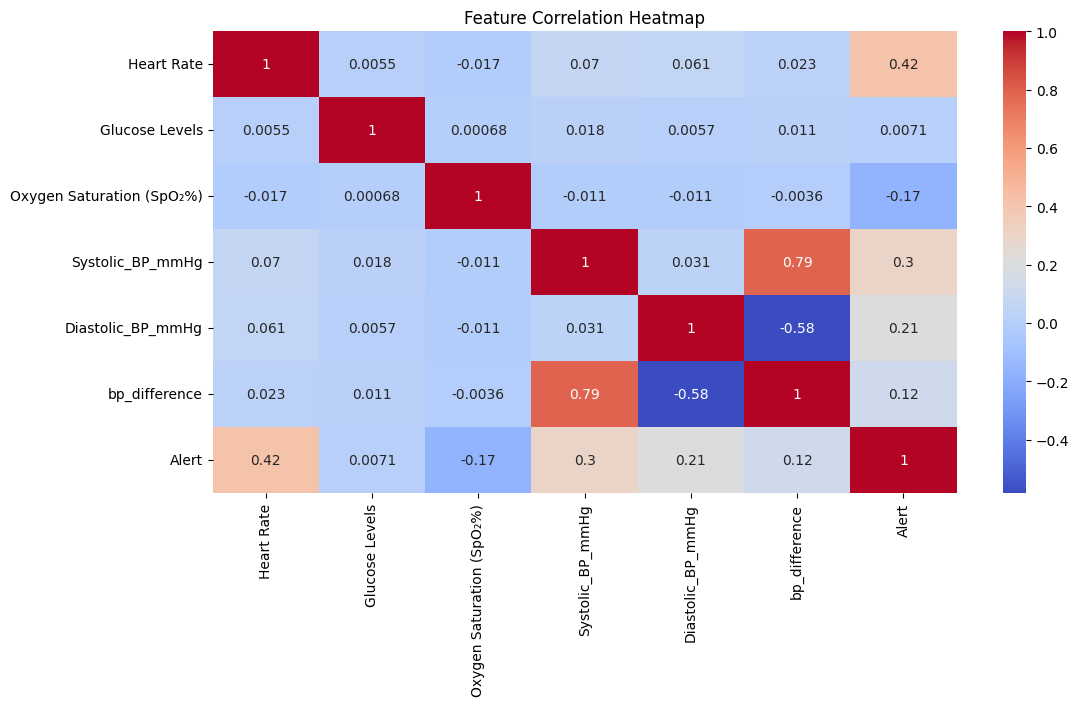

In [67]:
plt.figure(figsize=(12, 6))
sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [70]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_smote) 




In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [73]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [74]:
for name, model in models.items():
    print(f"\n🔍 Training Model: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy for {name}: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))


🔍 Training Model: Logistic Regression
✅ Accuracy for Logistic Regression: 0.7543
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1431
           1       0.77      0.75      0.76      1516

    accuracy                           0.75      2947
   macro avg       0.75      0.75      0.75      2947
weighted avg       0.75      0.75      0.75      2947


🔍 Training Model: Random Forest
✅ Accuracy for Random Forest: 1.0000
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1431
           1       1.00      1.00      1.00      1516

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947


🔍 Training Model: SVM (Linear)
✅ Accuracy for SVM (Linear): 0.7587
📊 Classification Report:
              precision    recall  f1-score   suppo

C:\Users\This PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [77]:
import pickle
svm_rbf_model = models["SVM (RBF)"]
with open('svm_rbf_model.pkl', 'wb') as file:
    pickle.dump(svm_rbf_model, file)


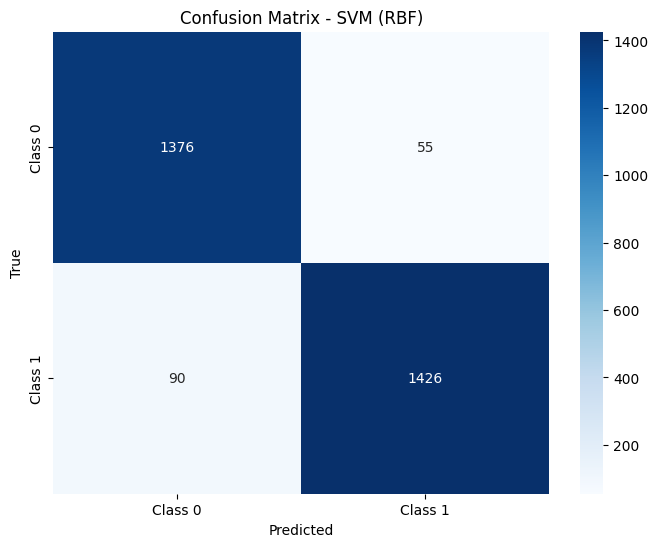

In [78]:
y_pred = svm_rbf_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - SVM (RBF)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()